LAB 06<br>
gr.220A<br>
pp53828<br>
Piotr Pietrusewicz<br>

In [2]:
import numpy as np

def wiPCA(matrix, target_dimension):
    # srednia kazdej kolumny
    means = np.mean(matrix, axis=0)
    # odchylenie standardowe kazdej kolumny (wielkosc rozproszenia danych wokol ich sredniej)
    stds = np.std(matrix, axis=0)

    stds[stds == 0] = 1e-9

    # standaryzacja macierzy (przeksztalcenie macierzy, by srednia wartosc byla rowna 0, a odchylenie standardowe bylo rowne 1)
    standarized_matrix = (matrix - means) / stds
    
    # macierz zaleznosci miedzy danymi (rosna razem, czy sa niezalezne od siebie)
    covariance_matrix = np.cov(standarized_matrix, rowvar=False)

    # wartosci wlasne i ich wektory wlasne (mowia o tym, jakie sa kierunki, w ktorych dane sa najbardziej zroznicowane, lub skorelowane)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # sortowanie wartosci wlasnych i wektorow wlasnych malejaco
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # wybor najwazniejszych wektorow wlasnych, ktore reprezentują glowne kierunki zmiennosci w danych,
    # ktore chcemy zachowac podczas redukcji wymiarowosci, co pozwala nam zachowac jak najwiecej informacji
    principal_components = eigenvectors[:, :target_dimension]

    # rzutowanie na nowa zredukowana przestrzen
    reduced_array = np.dot(standarized_matrix, principal_components)

    return(reduced_array, eigenvectors, eigenvalues, means)    

# Zadanie 1

# a)

In [3]:
data = np.random.randn(200, 2)
data[:, 1] = 2 * data[:, 0] + np.random.normal(0, 0.5, size=200)

# b)

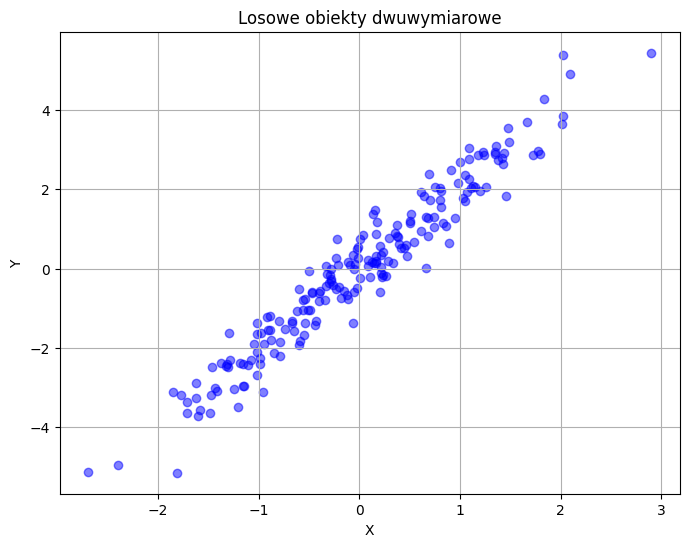

In [4]:
import matplotlib.pyplot as plt

x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Losowe obiekty dwuwymiarowe')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# c)

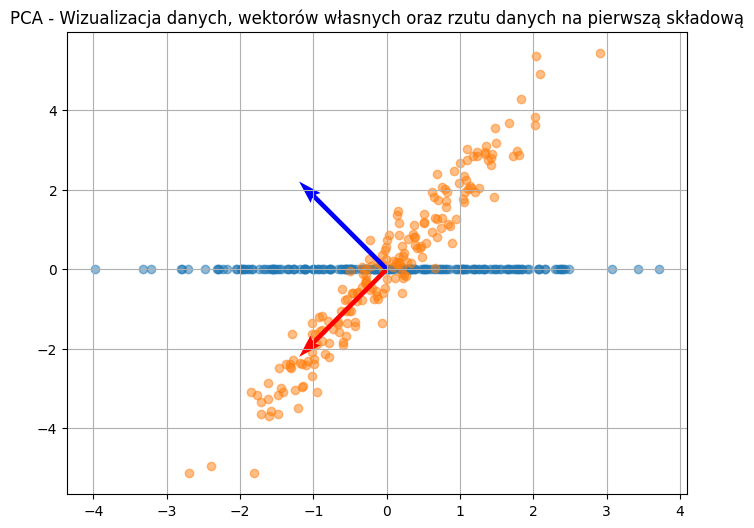

In [5]:
projected_data, eigenvectors, eigenvalues, _ = wiPCA(data, 1)

plt.figure(figsize=(8, 6))

plt.scatter(projected_data, np.zeros_like(projected_data), alpha=0.5)
plt.scatter(data[:,0], data[:,1], alpha=0.5)

# Wektory własne PCA
plt.quiver([0, 0], [0, 0], eigenvectors[0], eigenvectors[1], color=['r','b'], scale=5)

plt.title('PCA - Wizualizacja danych, wektorów własnych oraz rzutu danych na pierwszą składową')
plt.grid(True)
plt.show()


# Zadanie 2

# a)

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# b)

In [7]:
reduced_data, _, _, _ = wiPCA(X, 2)

# c)

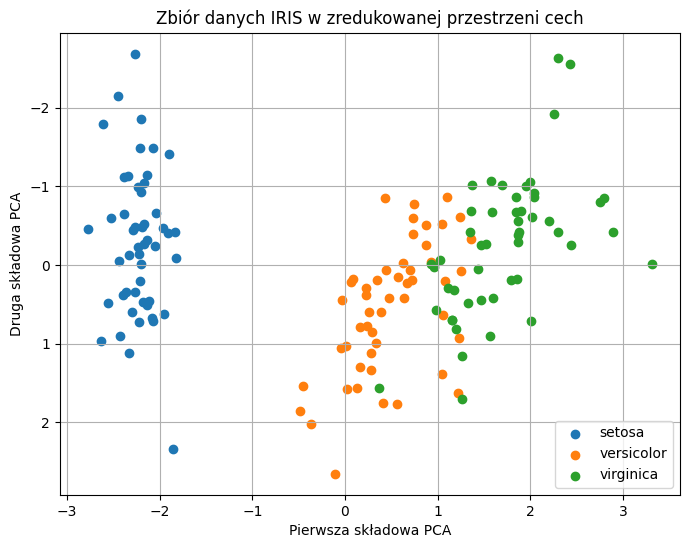

In [8]:
plt.figure(figsize=(8, 6))

for i in range(len(np.unique(y))):
    plt.scatter(reduced_data[y == i, 0], reduced_data[y == i, 1], label=target_names[i])

plt.title('Zbiór danych IRIS w zredukowanej przestrzeni cech')
plt.xlabel('Pierwsza składowa PCA')
plt.ylabel('Druga składowa PCA')
plt.legend(loc='lower right')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# Zadanie 3

# a)

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

# b)

In [10]:
reduced_array, eigenvectors, eigenvalues, means = wiPCA(X, 2)

# c)

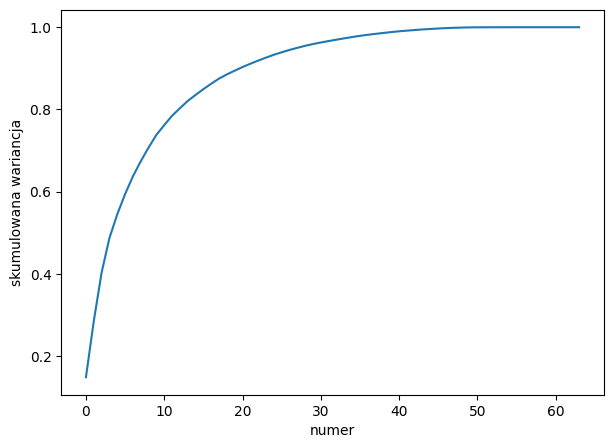

In [11]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numer')
plt.ylabel('skumulowana wariancja')
plt.gcf().set_size_inches(7, 5)

# d)

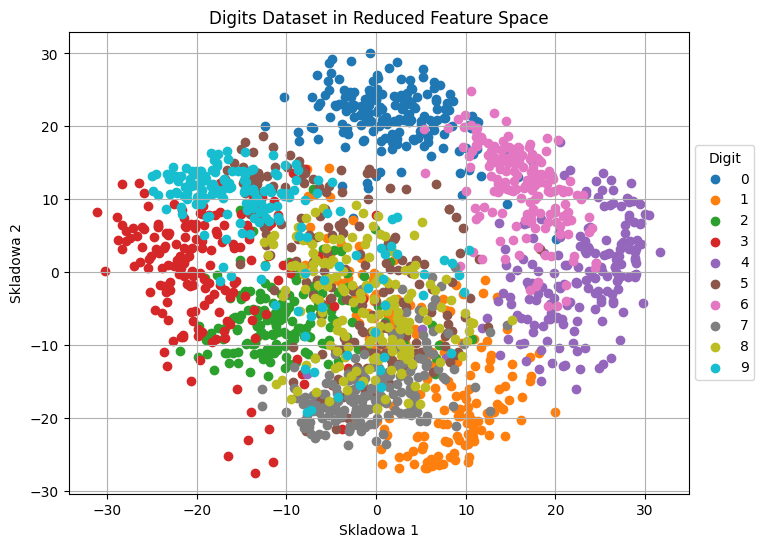

In [12]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(X)

plt.figure(figsize=(8, 6))

for i in range(10):
    plt.scatter(reduced_data[y == i, 0], reduced_data[y == i, 1], label=str(i))

plt.title('Digits Dataset in Reduced Feature Space')
plt.xlabel('Skladowa 1')
plt.ylabel('Skladowa 2')

plt.legend(title='Digit', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

# e)

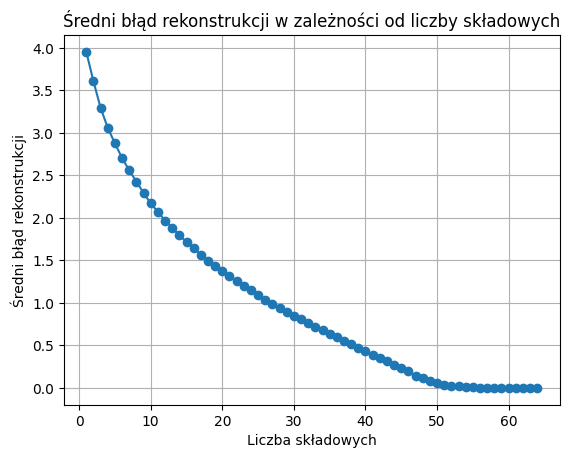

In [14]:
digits = load_digits()
X = digits.data

n_components_range = range(1, min(X.shape) + 1)

mean_reconstruction_errors = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X)
    
    reconstructed_data = pca.inverse_transform(pca.transform(X))
    
    reconstruction_errors = np.sqrt(np.mean((X - reconstructed_data)**2, axis=1))
    
    mean_error = np.mean(reconstruction_errors)
    
    mean_reconstruction_errors.append(mean_error)

plt.plot(n_components_range, mean_reconstruction_errors, marker='o')
plt.xlabel('Liczba składowych')
plt.ylabel('Średni błąd rekonstrukcji')
plt.title('Średni błąd rekonstrukcji w zależności od liczby składowych')
plt.grid(True)
plt.show()